 **AUTOMATIC IDENTIFICATION OF CHRONIC RESPIRATORY DISEASES THROUGH INTELLIGENT AUDIO ANALYSIS**

This notebook belongs to the research work called "Automatic identification of chronic respiratory diseases through intelligent audio analysis" 2024.

**INSTRUCTIONS**:


1.   **Data Request**: The request for data should be made via Gmail . In your email, please specify the purpose and intended use of the data.
2.   **Drive Link**: The data is shared via a Drive link.
1.   **Folder Creation**: In your Drive, under “My Drive”, create a new folder named “InaoeProyecto”.
2.   **Shortcut Addition**: A folder named “DBSegBalanceada” will be shared with you via a link. Please add this folder as a shortcut to your “InaoeProyecto” folder.

**Important Note**: You are not authorized to share this data with third parties without prior authorization.

Please ensure to follow these instructions carefully to successfully access and use the data. If you have any questions or need further assistance, feel free to ask.


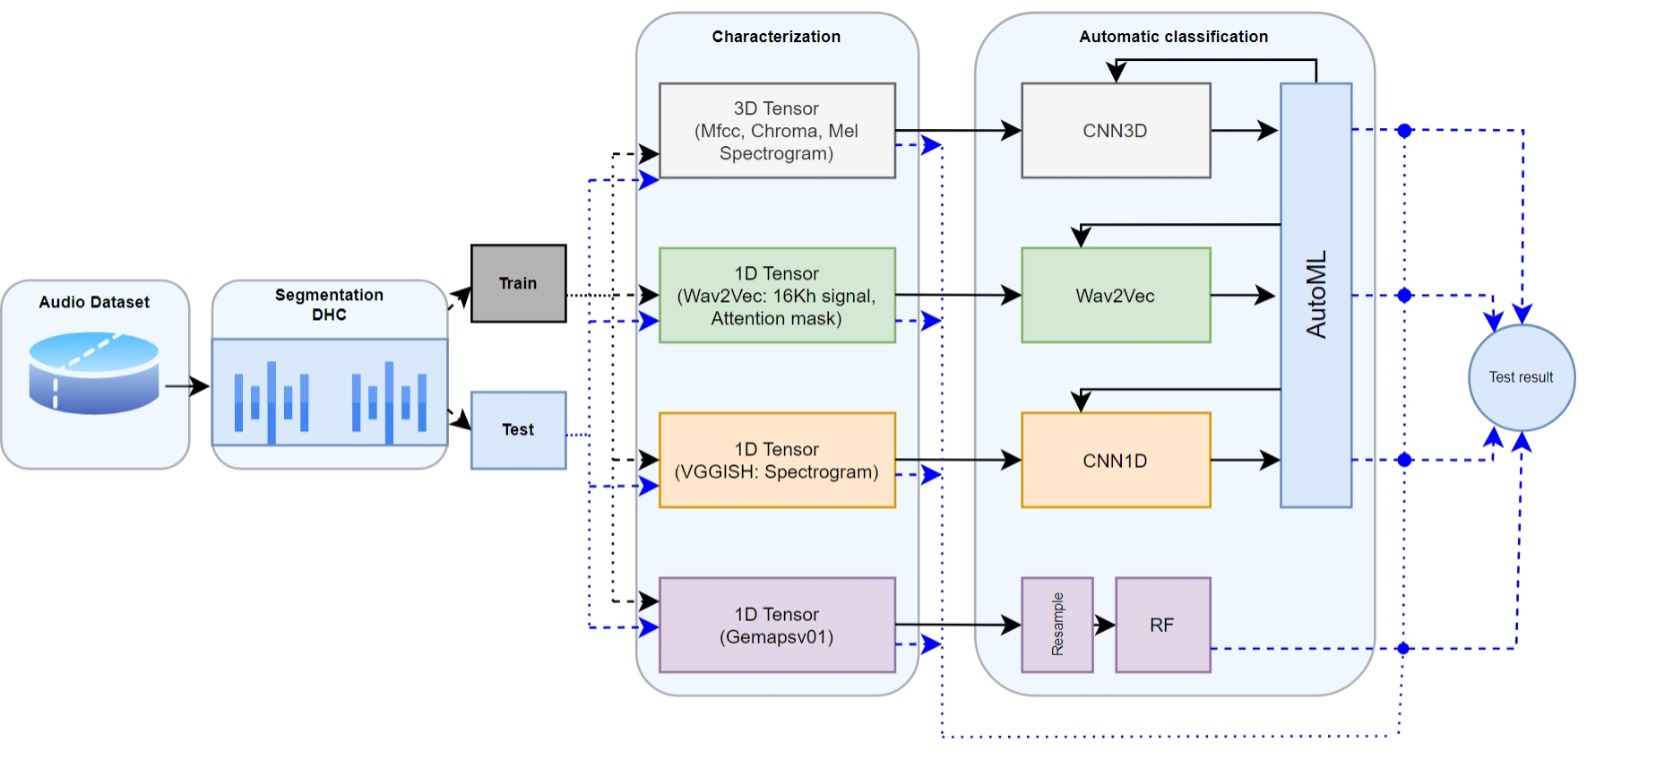

# **1. CNN3D**

1. Install requirements
2. Extract cough segments with Digital Hysteresis Comparator (DHC)
3. Split train and test sets
4. Extract features from train and test sets
5. Run auto ml with 3D CNN architecture to find the best training parameters
6. Replace parameters found with AutoML in CNN3D architecture
7. Train 3D CNN with train
8. Evaluate 3D CNN model with test


## 1.1. Installation Requirements

---



In [ ]:
pip install hpsklearn #Hyperparameter Optimization for sklearn

In [ ]:
pip install hyperas #Wrapper for convenient hyperparameter optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.1 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import librosa
import librosa.display
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from scipy.io import wavfile
from unicodedata import normalize
from scipy.io import wavfile
from scipy.stats import norm
import statistics
from scipy.stats import shapiro
from scipy.stats import normaltest
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, DepthwiseConv2D, Dense, GlobalAveragePooling2D,  AveragePooling2D
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import MaxPooling3D
from keras.layers import GlobalAveragePooling3D
from keras.layers import GlobalMaxPooling3D
from keras.layers import Conv3D
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras.layers import Input
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, Conv1D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers import ELU, PReLU, LeakyReLU
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling1D
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.layers import ELU, PReLU, LeakyReLU
import csv
import zipfile
from sklearn.neighbors import KNeighborsClassifier
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import tpe
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from keras import backend as K

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [ ]:
from sklearn.metrics import roc_auc_score
from hyperas import optim
from hyperas.distributions import choice, uniform
from hyperopt import Trials, STATUS_OK, tpe
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import mean_absolute_error
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1_l2
import sys

## 1.2. Segmentation with Digital Hysteresis Comparator (DHC)

---

The resource used was taken from the following publication:
Orlandic, L., Teijeiro, T. & Atienza, D. The COUGHVID crowdsourcing dataset, a corpus for the study of large-scale cough analysis algorithms. Sci Data 8, 156 (2021). https://doi.org/10.1038/s41597-021-00937-4

Git hub repository: https://github.com/bagustris/detect-segment-cough/blob/master/segment_cough.py

In [ ]:
#Extract file segment_cough.py #COMENTAR
path = '/content/audios/'

for aud in os.listdir(path):
  id = aud.split('_')[1]
  if not os.path.isdir('DATASET/'+ id):
    os.mkdir('DATASET/'+id)
  if 'tos' in aud:
    os.system('python3 /content/segment_cough.py -i ' +path+aud)

FileNotFoundError: [Errno 2] No such file or directory: '/content/audios/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 1.3. Division train and test

---



Link to access the CRD DB

/content/drive/MyDrive/InaoeProyecto/BDSegBalanceada/foldsCompleto

Link to access the Respiratory Conditions DB

/content/drive/MyDrive/InaoeProyecto/BDSegBalanceada/newfoldsCompleto

In [ ]:
#Split the data set for train and test
#Replace url with the location of data train and test
train = pd.read_csv("/content/drive/MyDrive/InaoeProyecto/BDSegBalanceada/foldsXedad/train/fold6train.csv")

test = pd.read_csv("/content/drive/MyDrive/InaoeProyecto/BDSegBalanceada/foldsXedad/test/fold6test.csv")

## 1.4. 3D Characterization (MFCC, chroma, Mel's Spectrum)

---



In [ ]:
#Feature extraction mffccs, mel, lpc
def extract_features(file_name, max_pad_len=100,mel_bands=33, mfcc_mel=3):

    try:
        audio, sample_rate = librosa.load(file_name)
        mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_fft=2048, hop_length=512, n_mels=mel_bands)
        log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=mel_bands)
        chroma_stft = librosa.feature.chroma_stft(y=audio, n_chroma=mel_bands)

        pad_width = max_pad_len - log_mel_spectrogram.shape[1]
        mfccscaled = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        melscaled = np.pad(log_mel_spectrogram, pad_width=((0, 0), (0, pad_width)), mode='constant')
        chromascaled = np.pad(chroma_stft, pad_width=((0, 0), (0, pad_width)), mode='constant')


        featuresscaled =  np.stack([melscaled,mfccscaled,chromascaled], axis=2)

    except Exception as e:
        print("Error: ", file_name, e)
        return None
    return featuresscaled

In [ ]:
# 3D TRAIN FEATURE EXTRACTION
featurestrain = []

for index, row in tqdm(train.iterrows(), total=train.__len__()):

    file_name = str(row["path"]) +  "/" + str(row["Name"])
    class_label = row["Class"]
    data1 = extract_features(file_name, max_pad_len=142, mel_bands=33, mfcc_mel=3)
    featurestrain.append([data1, class_label])


# Converts to Pandas Dataframe, the MFCC into a column and the label
featurestrain = pd.DataFrame(featurestrain, columns=['feature','class'])
featurestrain.dropna(inplace=True)

100%|██████████| 287/287 [02:50<00:00,  1.69it/s]


In [ ]:
# FEATURE EXTRACTION 3D TEST
featurestest = []

for index, row in tqdm(test.iterrows(), total=test.__len__()):

    file_name = str(row["path"]) +  "/" + str(row["Name"])
    class_label = row["Class"]
    data1 = extract_features(file_name, max_pad_len=142, mel_bands=33, mfcc_mel=3)
    featurestest.append([data1, class_label])


# Converts to Pandas Dataframe, the MFCC into a column and the label
featurestest = pd.DataFrame(featurestest, columns=['feature','class'])
featurestest.dropna(inplace=True)

100%|██████████| 32/32 [00:18<00:00,  1.75it/s]


In [ ]:
#Assignment of train and test in variables for model input
from sklearn import preprocessing

le = LabelEncoder()

x_train = np.array(featurestrain.feature.tolist())
y_train = to_categorical(le.fit_transform(np.array(featurestrain['class'].tolist())))
x_test =  np.array(featurestest.feature.tolist())
y_test= to_categorical(le.fit_transform(np.array(featurestest['class'].tolist())))
print("Test size")
print(x_test.shape)

count=featurestrain.groupby(['class'])["class"].count()
print(count)

print("Train size")
print(x_train.shape)
a=pd.DataFrame(y_train)
b=a.groupby(0)[0].count()
print(b)

Test size
(32, 33, 142, 3)
class
Negativo    138
Positivo    149
Name: class, dtype: int64
Train size
(287, 33, 142, 3)
0
0.0    149
1.0    138
Name: 0, dtype: int64


## 1.5. AutoML

---



In [ ]:
#Metric calculation
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

The CNN3D architecture used in this work is based on the proposal of the work of García, Arley Magnolia Aquino. "Análisis acústico de la tos para detección de COVID con énfasis en el balanceo de clases." (2023).

Params testing: 
{'activation': 'relu', 'batch_size': 28, 'dropout1': 0.75, 'epochs': 70, 'optimizer': 'adam', 'regulL': 0.27437410884072466, 'regulLL': 0.5392751351590968}
Epoch 1/70

11/11 [==============================] - 4s 110ms/step - loss: 646.7936 - recall_m: 0.4838

Epoch 2/70

11/11 [==============================] - 1s 79ms/step - loss: 549.4770 - recall_m: 0.5097

Epoch 3/70

11/11 [==============================] - 1s 84ms/step - loss: 462.8294 - recall_m: 0.5357

Epoch 4/70

11/11 [==============================] - 1s 81ms/step - loss: 385.3550 - recall_m: 0.5260

Epoch 5/70

11/11 [==============================] - 1s 84ms/step - loss: 315.2995 - recall_m: 0.5097

Epoch 6/70

11/11 [==============================] - 1s 85ms/step - loss: 253.8942 - recall_m: 0.5227

Epoch 7/70

11/11 [==============================] - 1s 85ms/step - loss: 201.0847 - recall_m: 0.5325

Epoch 8/70

11/11 [==============================] - 2s 152ms/step - loss: 157.6044 - recall_m: 0.5390

E

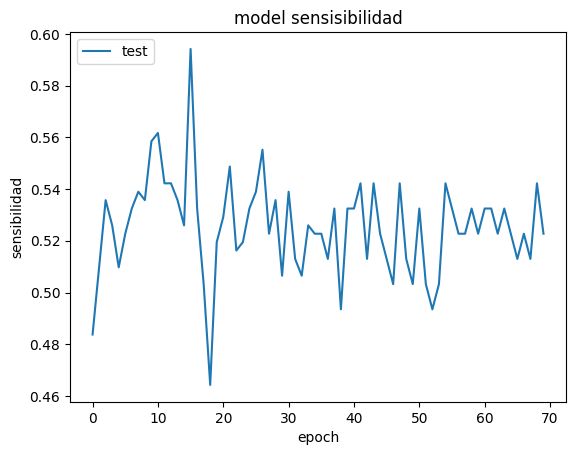

Params testing: 
{'activation': 'relu', 'batch_size': 28, 'dropout1': 0.75, 'epochs': 70, 'optimizer': 'adadelta', 'regulL': 0.9415465086971307, 'regulLL': 0.3910976262547087}
Epoch 1/70

11/11 [==============================] - 2s 86ms/step - loss: 2104.2551 - recall_m: 0.5032

Epoch 2/70

11/11 [==============================] - 1s 87ms/step - loss: 2097.4282 - recall_m: 0.5260

Epoch 3/70

11/11 [==============================] - 1s 85ms/step - loss: 2098.2588 - recall_m: 0.5097

Epoch 4/70

11/11 [==============================] - 1s 98ms/step - loss: 2099.3533 - recall_m: 0.5617

Epoch 5/70

11/11 [==============================] - 1s 125ms/step - loss: 2097.5286 - recall_m: 0.4968

Epoch 6/70

11/11 [==============================] - 1s 133ms/step - loss: 2098.5173 - recall_m: 0.4968

Epoch 7/70

11/11 [==============================] - 1s 126ms/step - loss: 2095.1934 - recall_m: 0.5747

Epoch 8/70

11/11 [==============================] - 1s 110ms/step - loss: 2094.6191 - recall

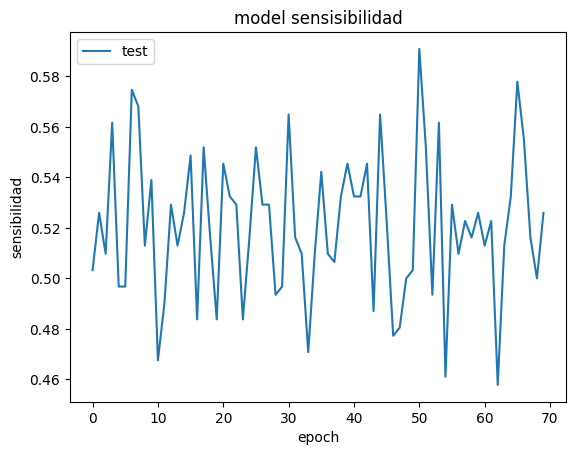

Params testing: 
{'activation': 'relu', 'batch_size': 128, 'dropout1': 0.5, 'epochs': 70, 'optimizer': 'adam', 'regulL': 0.25577098226992356, 'regulLL': 0.6444291007883225}
Epoch 1/70

3/3 [==============================] - 3s 242ms/step - loss: 642.7967 - recall_m: 0.4353

Epoch 2/70

3/3 [==============================] - 1s 233ms/step - loss: 602.4830 - recall_m: 0.5428

Epoch 3/70

3/3 [==============================] - 1s 231ms/step - loss: 565.3752 - recall_m: 0.5933

Epoch 4/70

3/3 [==============================] - 1s 250ms/step - loss: 528.7759 - recall_m: 0.5441

Epoch 5/70

3/3 [==============================] - 1s 245ms/step - loss: 494.7384 - recall_m: 0.5285

Epoch 6/70

3/3 [==============================] - 1s 243ms/step - loss: 461.1763 - recall_m: 0.5812

Epoch 7/70

3/3 [==============================] - 1s 238ms/step - loss: 429.7333 - recall_m: 0.5545

Epoch 8/70

3/3 [==============================] - 1s 244ms/step - loss: 399.4892 - recall_m: 0.5790

Epoch 9/70


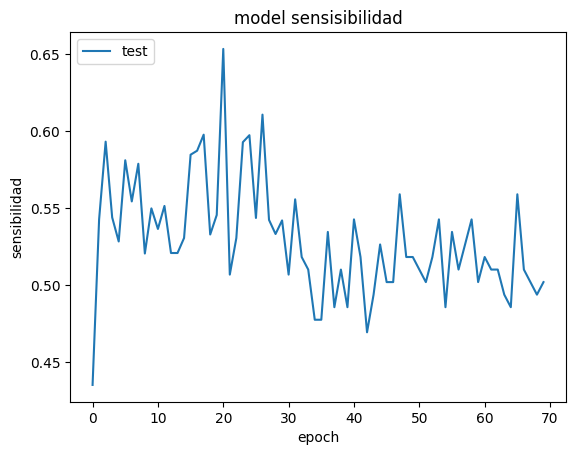

Params testing: 
{'activation': 'relu', 'batch_size': 28, 'dropout1': 0.75, 'epochs': 100, 'optimizer': 'adadelta', 'regulL': 0.1509283051263154, 'regulLL': 0.4830405260287566}
Epoch 1/100

11/11 [==============================] - 3s 88ms/step - loss: 419.1297 - recall_m: 0.5065

Epoch 2/100

11/11 [==============================] - 1s 86ms/step - loss: 420.2213 - recall_m: 0.4838

Epoch 3/100

11/11 [==============================] - 1s 87ms/step - loss: 421.8075 - recall_m: 0.5195

Epoch 4/100

11/11 [==============================] - 1s 87ms/step - loss: 419.1902 - recall_m: 0.4740

Epoch 5/100

11/11 [==============================] - 1s 87ms/step - loss: 421.4206 - recall_m: 0.5000

Epoch 6/100

11/11 [==============================] - 1s 87ms/step - loss: 420.4318 - recall_m: 0.4318

Epoch 7/100

11/11 [==============================] - 1s 87ms/step - loss: 418.8055 - recall_m: 0.5097

Epoch 8/100

11/11 [==============================] - 1s 85ms/step - loss: 419.5851 - recall_m:

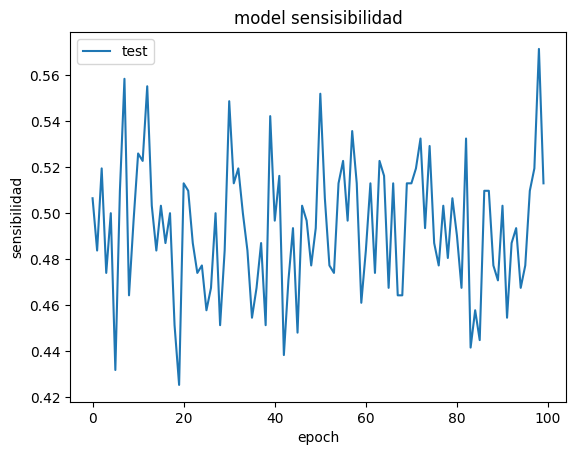

Params testing: 
{'activation': 'relu', 'batch_size': 28, 'dropout1': 0.5, 'epochs': 100, 'optimizer': 'adadelta', 'regulL': 0.7102743153847385, 'regulLL': 0.2341281430551172}
Epoch 1/100

11/11 [==============================] - 2s 90ms/step - loss: 1560.7839 - recall_m: 0.5779

Epoch 2/100

11/11 [==============================] - 1s 90ms/step - loss: 1560.0133 - recall_m: 0.5357

Epoch 3/100

11/11 [==============================] - 1s 90ms/step - loss: 1559.1160 - recall_m: 0.5779

Epoch 4/100

11/11 [==============================] - 1s 126ms/step - loss: 1559.3412 - recall_m: 0.5195

Epoch 5/100

11/11 [==============================] - 1s 131ms/step - loss: 1558.7781 - recall_m: 0.5942

Epoch 6/100

11/11 [==============================] - 1s 126ms/step - loss: 1558.1351 - recall_m: 0.5357

Epoch 7/100

11/11 [==============================] - 1s 131ms/step - loss: 1557.7909 - recall_m: 0.5617

Epoch 8/100

11/11 [==============================] - 1s 92ms/step - loss: 1557.3666 

mean_absolute_error:
0.45438355
 40%|████      | 4/10 [08:47<10:25, 104.28s/trial, best loss: -0.49809372425079346]

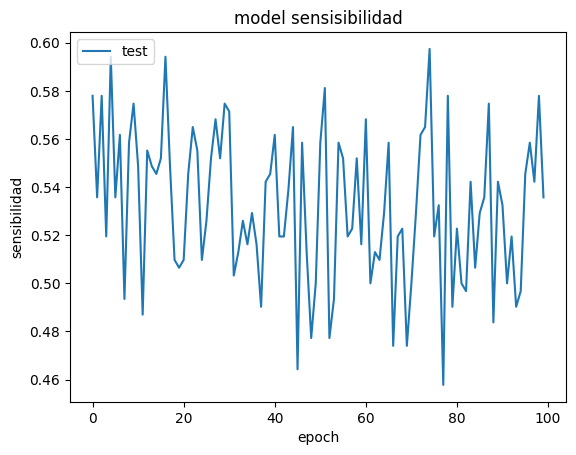

Params testing: 
{'activation': 'relu', 'batch_size': 28, 'dropout1': 0.5, 'epochs': 100, 'optimizer': 'rmsprop', 'regulL': 0.7820278944484773, 'regulLL': 0.5840327454221684}
Epoch 1/100

11/11 [==============================] - 2s 104ms/step - loss: 1450.7418 - recall_m: 0.5292

Epoch 2/100

11/11 [==============================] - 1s 116ms/step - loss: 1029.7748 - recall_m: 0.5519

Epoch 3/100

11/11 [==============================] - 1s 130ms/step - loss: 746.8342 - recall_m: 0.5455

Epoch 4/100

11/11 [==============================] - 2s 138ms/step - loss: 524.2125 - recall_m: 0.5390

Epoch 5/100

11/11 [==============================] - 2s 144ms/step - loss: 349.2665 - recall_m: 0.4740

Epoch 6/100

11/11 [==============================] - 1s 132ms/step - loss: 218.5299 - recall_m: 0.5617

Epoch 7/100

11/11 [==============================] - 1s 99ms/step - loss: 131.0058 - recall_m: 0.5422

Epoch 8/100

11/11 [==============================] - 1s 99ms/step - loss: 85.1077 - reca

mean_absolute_error:
0.49793297
 50%|█████     | 5/10 [11:09<09:52, 118.60s/trial, best loss: -0.49809372425079346]

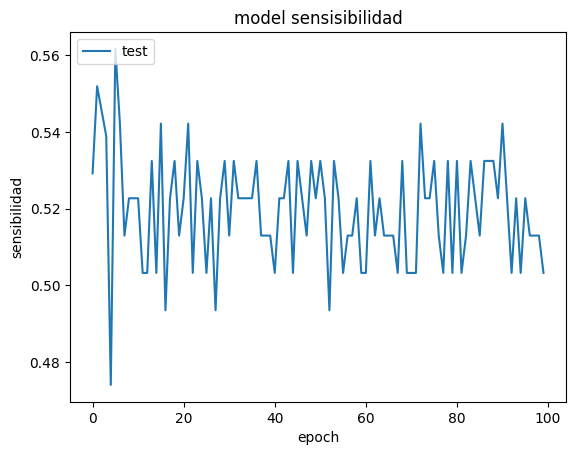

Params testing: 
{'activation': 'relu', 'batch_size': 28, 'dropout1': 0.25, 'epochs': 100, 'optimizer': 'adam', 'regulL': 0.1580213743102845, 'regulLL': 0.2891070097428413}
Epoch 1/100

11/11 [==============================] - 4s 114ms/step - loss: 349.5441 - recall_m: 0.5292

Epoch 2/100

11/11 [==============================] - 1s 102ms/step - loss: 274.2922 - recall_m: 0.5844

Epoch 3/100

11/11 [==============================] - 1s 105ms/step - loss: 209.8145 - recall_m: 0.5519

Epoch 4/100

11/11 [==============================] - 1s 103ms/step - loss: 155.3797 - recall_m: 0.5455

Epoch 5/100

11/11 [==============================] - 1s 109ms/step - loss: 110.7408 - recall_m: 0.6006

Epoch 6/100

11/11 [==============================] - 1s 105ms/step - loss: 75.5599 - recall_m: 0.6299

Epoch 7/100

11/11 [==============================] - 1s 106ms/step - loss: 49.2241 - recall_m: 0.5942

Epoch 8/100

11/11 [==============================] - 1s 104ms/step - loss: 31.2429 - recall_m

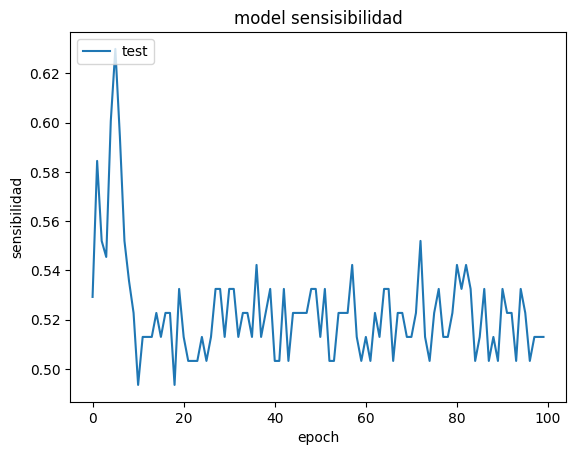

Params testing: 
{'activation': 'relu', 'batch_size': 128, 'dropout1': 0.75, 'epochs': 70, 'optimizer': 'adam', 'regulL': 0.27837678486411244, 'regulLL': 0.6049315497705906}
Epoch 1/70

3/3 [==============================] - 4s 396ms/step - loss: 708.9640 - recall_m: 0.4966

Epoch 2/70

3/3 [==============================] - 2s 430ms/step - loss: 676.4468 - recall_m: 0.4924

Epoch 3/70

3/3 [==============================] - 2s 417ms/step - loss: 638.6917 - recall_m: 0.5396

Epoch 4/70

3/3 [==============================] - 2s 426ms/step - loss: 605.3419 - recall_m: 0.5122

Epoch 5/70

3/3 [==============================] - 1s 296ms/step - loss: 577.3229 - recall_m: 0.4891

Epoch 6/70

3/3 [==============================] - 1s 256ms/step - loss: 546.2281 - recall_m: 0.5656

Epoch 7/70

3/3 [==============================] - 1s 266ms/step - loss: 519.4195 - recall_m: 0.5174

Epoch 8/70

3/3 [==============================] - 1s 253ms/step - loss: 491.4097 - recall_m: 0.5392

Epoch 9/70

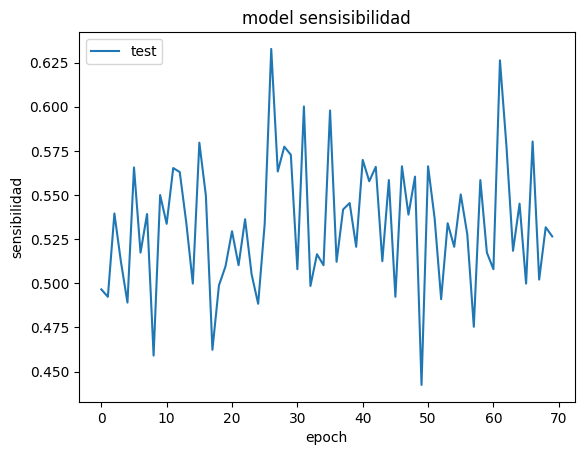

Params testing: 
{'activation': 'relu', 'batch_size': 128, 'dropout1': 0.75, 'epochs': 100, 'optimizer': 'adadelta', 'regulL': 0.28143244142533874, 'regulLL': 0.09610929438675286}
Epoch 1/100

3/3 [==============================] - 3s 268ms/step - loss: 634.1007 - recall_m: 0.5217

Epoch 2/100

3/3 [==============================] - 1s 273ms/step - loss: 634.9351 - recall_m: 0.5481

Epoch 3/100

3/3 [==============================] - 1s 270ms/step - loss: 634.3076 - recall_m: 0.5347

Epoch 4/100

3/3 [==============================] - 1s 261ms/step - loss: 636.3455 - recall_m: 0.4998

Epoch 5/100

3/3 [==============================] - 1s 268ms/step - loss: 635.0942 - recall_m: 0.5536

Epoch 6/100

3/3 [==============================] - 1s 268ms/step - loss: 634.0438 - recall_m: 0.5129

Epoch 7/100

3/3 [==============================] - 1s 271ms/step - loss: 633.6240 - recall_m: 0.4943

Epoch 8/100

3/3 [==============================] - 1s 271ms/step - loss: 633.7045 - recall_m: 0.51

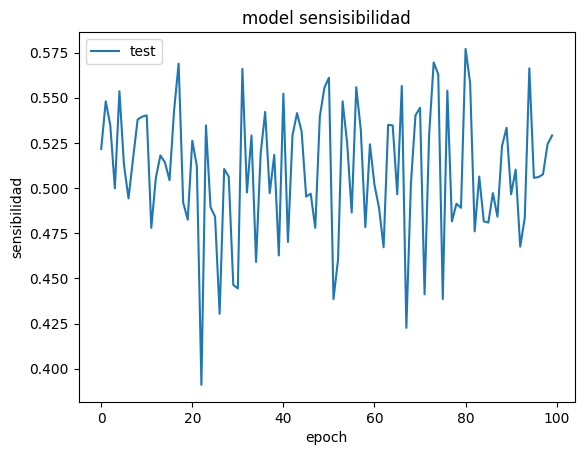

Params testing: 
{'activation': 'relu', 'batch_size': 28, 'dropout1': 0.5, 'epochs': 100, 'optimizer': 'rmsprop', 'regulL': 0.7155140126593502, 'regulLL': 0.151942828609821}
Epoch 1/100

11/11 [==============================] - 2s 110ms/step - loss: 1283.0206 - recall_m: 0.4968

Epoch 2/100

11/11 [==============================] - 2s 142ms/step - loss: 911.3316 - recall_m: 0.5844

Epoch 3/100

11/11 [==============================] - 1s 134ms/step - loss: 660.9596 - recall_m: 0.5942

Epoch 4/100

11/11 [==============================] - 2s 137ms/step - loss: 463.2350 - recall_m: 0.5649

Epoch 5/100

11/11 [==============================] - 1s 130ms/step - loss: 307.9697 - recall_m: 0.5422

Epoch 6/100

11/11 [==============================] - 2s 143ms/step - loss: 192.6517 - recall_m: 0.5552

Epoch 7/100

11/11 [==============================] - 1s 132ms/step - loss: 115.8772 - recall_m: 0.5162

Epoch 8/100

11/11 [==============================] - 1s 122ms/step - loss: 75.5112 - reca

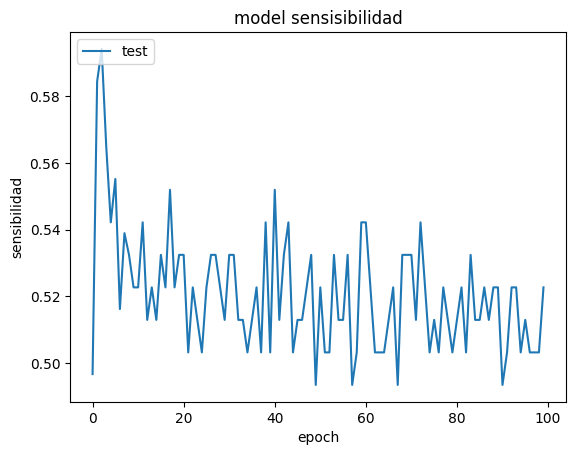

100%|██████████| 10/10 [19:24<00:00, 116.48s/trial, best loss: -0.5244553089141846]
best parameters:  {'batch_size': 1, 'dropout1': 2, 'epochs': 1, 'optimizer': 0, 'regulL': 0.28143244142533874, 'regulLL': 0.09610929438675286}


In [ ]:
X = []
y = []
X_val = []
y_val = []
modelauto= None

space = {
            'dropout1': hp.choice('dropout1', [.25,.50, .75]),
            'batch_size' : hp.choice('batch_size', [28,128]),

            'epochs' :  hp.choice('epochs', [70, 100]),
            'regulL': hp.uniform('regulL', 0, 1),
            'regulLL': hp.uniform('regulLL', 0, 1),
            'optimizer': hp.choice('optimizer',['adadelta','adam','rmsprop']),
            'activation': 'relu'
        }

def f_nn(params):
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Activation
    from keras.optimizers import Adadelta, Adam
    from tensorflow.keras.optimizers import RMSprop

    print ('Params testing: ', params)


    input_shape=(33, 142, 3) #Change input according to the result of x_train.shape
    kernel_size = 2
    model = Sequential()
    #First layer
    model.add(Conv2D(16,
            kernel_size=(kernel_size, kernel_size), padding="valid",
            strides=1, input_shape=input_shape, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(params['dropout1']))
    #Second layer
    model.add(Conv2D(32,
            kernel_size=(kernel_size, kernel_size), padding="valid", kernel_regularizer=regularizers.l1_l2(l1=(params['regulL']), l2=(params['regulLL'])),#kernel_regularizer=regularizers.l2((params['regul'])),
            strides=1, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(params['dropout1']))
    #Third layer
    model.add(Conv2D(64,
            kernel_size=(kernel_size, kernel_size), padding="valid",kernel_regularizer=regularizers.l1_l2(l1=(params['regulL']), l2=(params['regulLL'])),#
            strides=1, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(params['dropout1']))
    #Third layer
    model.add(Conv2D(128,
            kernel_size=(kernel_size, kernel_size), padding="valid",kernel_regularizer=regularizers.l1_l2(l1=(params['regulL']), l2=(params['regulLL'])),#
            strides=1, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(params['dropout1']))

    model.add(Flatten())

    #Classification
    model.add(Dense(2, activation= 'softmax'))



    model.compile(loss='binary_crossentropy', optimizer=params['optimizer'], metrics=[recall_m])

    global modelauto
    modelauto =model.fit(x_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], verbose = 1)


    pred_auc =model.predict(x_test, batch_size = 128, verbose = 0)

    acc=mean_absolute_error(y_test, pred_auc)
    print('mean_absolute_error:', acc)
    sys.stdout.flush()

    plt.plot(modelauto.history['recall_m'])
    plt.title('model sensisibilidad')
    plt.ylabel('sensibilidad')
    plt.xlabel('epoch')
    plt.legend(['test'], loc='upper left')
    plt.show()

    return {'loss': -acc, 'status': STATUS_OK}


trials = Trials()
best = fmin(f_nn, space, algo=tpe.suggest, max_evals=10, trials=trials)
print('best parameters: ', best)

## 1.6. Automatic classification

---


The CNN3D architecture used in this work is based on the proposal of the work of García, Arley Magnolia Aquino. "Análisis acústico de la tos para detección de COVID con énfasis en el balanceo de clases." (2023).

In [ ]:
#CNN features 3D
input_shape=(33, 142, 3) #Change input according to the result of x_train.shape, (Number of coefficients, window size, 3D tensor (MFCC, Chroma, Mel Spectrograms))
kernel_size = 2
model = Sequential()
#First layer
model.add(Conv2D(16,
      kernel_size=(kernel_size, kernel_size), padding="valid",  kernel_regularizer=regularizers.l1_l2(l1=9.999999747378752e-06, l2=9.999999747378752e-05),
      input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
# Second layer
model.add(Conv2D(32,
      kernel_size=(kernel_size, kernel_size), padding="valid",  kernel_regularizer=regularizers.l1_l2(l1=0.0, l2=9.999999747378752e-05),
       activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
#Third layer
model.add(Conv2D(64,
      kernel_size=(kernel_size, kernel_size), padding="valid", kernel_regularizer=regularizers.l1_l2(l1=0.0, l2=9.999999747378752e-06),
       activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
#Fourth layer
model.add(Conv2D(128,
      kernel_size=(kernel_size, kernel_size), padding="valid", kernel_regularizer=regularizers.l1_l2(l1=0.0, l2= 9.999999747378752e-05),
       activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Flatten())

#Classification
model.add(Dense(2, activation= 'softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 32, 141, 16)       208       
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 16, 70, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_40 (Dropout)        (None, 16, 70, 16)        0         
                                                                 
 conv2d_41 (Conv2D)          (None, 15, 69, 32)        2080      
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 7, 34, 32)         0         
 ng2D)                                                           
                                                                 
 dropout_41 (Dropout)        (None, 7, 34, 32)       

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[recall_m, specificity ])

In [ ]:
model_dropout = model.fit(x_train, y_train, batch_size=12,epochs=50,verbose=1,validation_data=(x_test, y_test))

Epoch 1/50
24/24 [==============================] - 3s 68ms/step - loss: 1.5055 - recall_m: 0.5928 - specificity: 0.5928 - val_loss: 0.6623 - val_recall_m: 0.6389 - val_specificity: 0.6389
Epoch 2/50
24/24 [==============================] - 1s 62ms/step - loss: 0.8201 - recall_m: 0.6064 - specificity: 0.6064 - val_loss: 0.9266 - val_recall_m: 0.5833 - val_specificity: 0.5833
Epoch 3/50
24/24 [==============================] - 1s 57ms/step - loss: 0.6178 - recall_m: 0.7213 - specificity: 0.7213 - val_loss: 0.7441 - val_recall_m: 0.5972 - val_specificity: 0.5972
Epoch 4/50
24/24 [==============================] - 1s 37ms/step - loss: 0.6005 - recall_m: 0.7039 - specificity: 0.7039 - val_loss: 0.7270 - val_recall_m: 0.6111 - val_specificity: 0.6111
Epoch 5/50
24/24 [==============================] - 1s 37ms/step - loss: 0.5641 - recall_m: 0.7213 - specificity: 0.7213 - val_loss: 0.6582 - val_recall_m: 0.7361 - val_specificity: 0.7361
Epoch 6/50
24/24 [==============================] - 1s 

## 1.7. Test Result

---



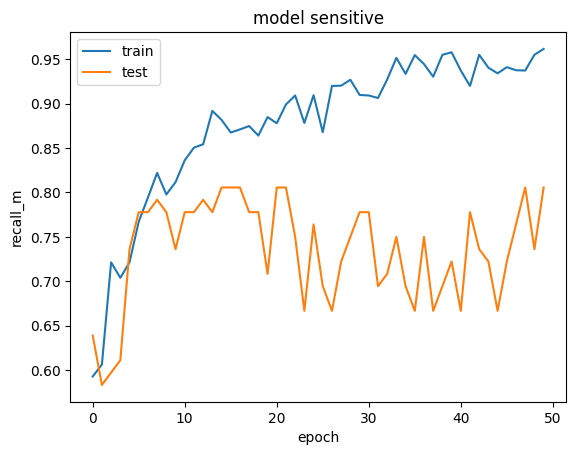

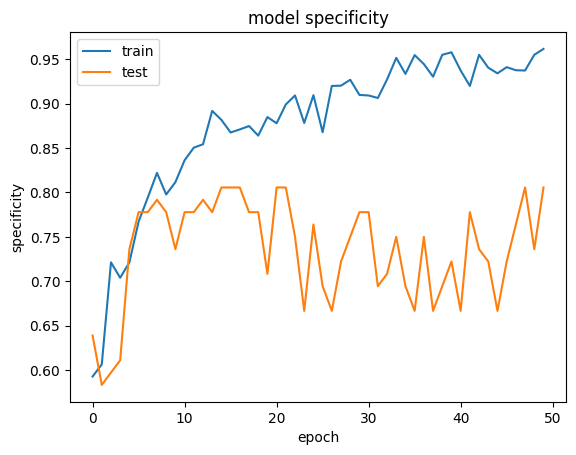

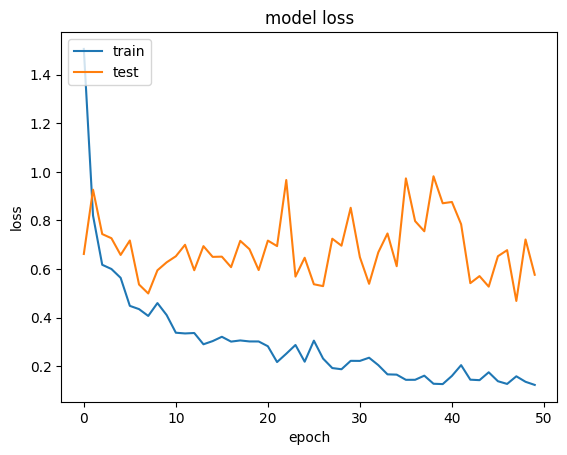

In [ ]:
# summarize history for accuracy
plt.plot(model_dropout.history['recall_m'])
plt.plot(model_dropout.history['val_recall_m'])
plt.title('model sensitive')
plt.ylabel('recall_m')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for specificity
plt.plot(model_dropout.history['specificity'])
plt.plot(model_dropout.history['val_specificity'])
plt.title('model specificity')
plt.ylabel('specificity')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_dropout.history['loss'])
plt.plot(model_dropout.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

y_pred = model.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_true=np.argmax(y_test, axis=1)
# Evaluation
ac=accuracy_score(y_true, y_pred)
print('Porcentaje de certeza : ',ac*100)
print('Precision: %.3f' % precision_score(y_true, y_pred, average='macro'))
print('Recall: %.3f' % recall_score(y_true, y_pred, average='macro'))
print('F1 Score: %.3f' % f1_score(y_true, y_pred, average='macro'))
matriz= confusion_matrix(y_true, y_pred)

target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))

1/1 [==============================] - 0s 109ms/step
Porcentaje de certeza :  81.25
Precision: 0.818
Recall: 0.808
F1 Score: 0.810
              precision    recall  f1-score   support

     class 0       0.85      0.73      0.79        15
     class 1       0.79      0.88      0.83        17

    accuracy                           0.81        32
   macro avg       0.82      0.81      0.81        32
weighted avg       0.82      0.81      0.81        32



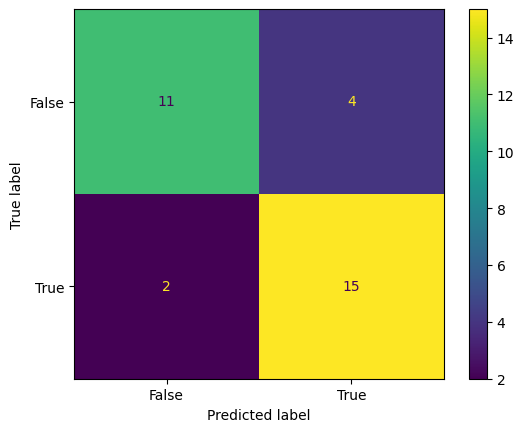

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
#tn= true negative
#fp= false positive
#fn= false negative
#tp= true positive
[tn, fp, fn, tp] = confusion_matrix(np.argmax(y_test, axis=1), y_pred).ravel()

spe = tn/(tn+fp)
sen = tp/(tp+fn)
print("Sensibilidad: "+str(sen)+" Especificidad: "+str(spe))
print("Tn " +str( tn )+" Fp "+str(fp)+" Fn "+ str(fn)+ " Tp " + str(tp))

Sensibilidad: 0.8823529411764706 Especificidad: 0.7333333333333333
Tn 11 Fp 4 Fn 2 Tp 15


# **2. Random Forest**

1. Install requirements
2. Extract cough segments with Digital Hysteresis Comparator (DHC)
3. Split train and test sets
4. Extract features from train and test sets (GEMAPSv01) with Open Smile
5. Perform a resample of the train set
7. Train Random Forest with train
8. Evaluate Random Forest algorithm with test

## 2.1. Installation Requirements

---



In [ ]:
pip install opensmile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.2/996.2 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.4/138.4 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for iso-639: filename=iso_639-0.4.5-py3-none-any.whl size=168840 sha256=0d2fce06448f04c5865ee7e7c658828f5bd92896890548f89f954df55c397363
  Stored in directory: /root/.cache/pip/wheels/d8/78/cc/5478ca3b1c3f602eae6f8cdbd78f909c0a0bfa0bbcb5c7771f
Successfully built iso-639


In [ ]:
#Install requeriments weka in python, based on https://colab.research.google.com/drive/1A9bZkPvXPAViipan7u9siQfkakChyYFV?usp=sharing#scrollTo=CgxRusBSCxrn
!apt-get install build-essential python3-dev
!apt-get install python3-pil python3-pygraphviz
!apt install openjdk-11-jdk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
python3-dev is already the newest version (3.10.6-1~22.04).
python3-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libimagequant0 libraqm0 mailcap mime-support python3-olefile
Suggested packages:
  python-pil-doc python-pygraphviz-doc
The following NEW packages will be installed:
  libimagequant0 libraqm0 mailcap mime-support python3-olefile python3-pil python3-pygraphviz
0 upgraded, 7 newly installed, 0 to remove and 30 not upgraded.
Need to get 606 kB of archives.
After this operation, 2,505 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libimagequant0 amd64 2.17.0-1 [34.6 kB]
Get:2

In [ ]:
#Install virtual home java in python based on https://colab.research.google.com/drive/1A9bZkPvXPAViipan7u9siQfkakChyYFV?usp=sharing#scrollTo=CgxRusBSCxrn
import os
import sys
sys.path
sys.path.append("/usr/lib/jvm/java-11-openjdk-amd64/bin/")
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64/"

In [ ]:
# install necessary Python libraries based on https://colab.research.google.com/drive/1A9bZkPvXPAViipan7u9siQfkakChyYFV?usp=sharing#scrollTo=CgxRusBSCxrn
!pip install numpy
!pip install python-javabridge
!pip install python-weka-wrapper3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-javabridge: filename=python_javabridge-4.0.3-cp310-cp310-linux_x86_64.whl size=1743196 sha256=6a949fdc768dab2d8493270e9974a9200fb02b6d8be32070cb59ec19d905538a
  Stored in directory: /root/.cache/pip/wheels/35/58/be/c5d71b71a9dd6585f897fa5b2d021e03962eb30d6b20797396
Successfully built python-javabridge
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for python-weka-wrapper3: filename=python_weka_wrapper3-0.2.14-py3-none-any.whl size=14496261 sha256=e7cce5bf7c3b5e062be46d39ff2a3ff449e1ae7c85973da3ed614a174e58910a
  Stored in directory: /root/.cache/pip/wheels/80/c5/f2/412fa8d3b181151e11b68d46daa52f96e9b832a2eca4bc6c88
  Created wheel for configurable-objects: filename=configur

In [ ]:
# start JVM based on https://colab.research.google.com/drive/1A9bZkPvXPAViipan7u9siQfkakChyYFV?usp=sharing#scrollTo=CgxRusBSCxrn
import weka.core.jvm as jvm
jvm.start(packages=True)

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/usr/local/lib/python3.10/dist-packages/javabridge/jars/rhino-1.7R4.jar', '/usr/local/lib/python3.10/dist-packages/javabridge/jars/runnablequeue.jar', '/usr/local/lib/python3.10/dist-packages/javabridge/jars/cpython.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/core.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/arpack_combined.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/python-weka-wrapper.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/weka.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/mtj.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support enabled


In [ ]:
import os
import tempfile
import traceback
import weka.core.converters as converters
from weka.classifiers import Classifier
from weka.experiments import SimpleCrossValidationExperiment, SimpleRandomSplitExperiment, Tester, ResultMatrix
from weka.filters import Filter
from weka.classifiers import FilteredClassifier
from weka.classifiers import Evaluation
from weka.classifiers import Classifier, Evaluation, PredictionOutput
from weka.core.classes import Random
import weka.plot.classifiers as plcls

## 2.2. Segmentation with Digital Hysteresis Comparator (DHC)

---

The resource used was taken from the following publication:
Orlandic, L., Teijeiro, T. & Atienza, D. The COUGHVID crowdsourcing dataset, a corpus for the study of large-scale cough analysis algorithms. Sci Data 8, 156 (2021). https://doi.org/10.1038/s41597-021-00937-4

Git hub repository: https://github.com/bagustris/detect-segment-cough/blob/master/segment_cough.py

In [ ]:
#Extract file segment_cough.py
path = '/content/audios/'

for aud in os.listdir(path):
  id = aud.split('_')[1]
  if not os.path.isdir('DATASET/'+ id):
    os.mkdir('DATASET/'+id)
  if 'tos' in aud:
    os.system('python3 /content/segment_cough.py -i ' +path+aud)

FileNotFoundError: [Errno 2] No such file or directory: '/content/audios/'

## 2.3. 1D Characterization (GEMAPS)

---

In [ ]:
#Read audio database (csv)
data= pd.read_csv("/content/drive/MyDrive/InaoeProyecto/BDSegBalanceada/fullfoldsXEdad/test/test_df_10.csv")
print(data)

    Unnamed: 0                                               path  \
0            8  /content/drive/MyDrive/InaoeProyecto/BDSegBala...   
1           10  /content/drive/MyDrive/InaoeProyecto/BDSegBala...   
2           16  /content/drive/MyDrive/InaoeProyecto/BDSegBala...   
3           26  /content/drive/MyDrive/InaoeProyecto/BDSegBala...   
4           31  /content/drive/MyDrive/InaoeProyecto/BDSegBala...   
5           69  /content/drive/MyDrive/InaoeProyecto/BDSegBala...   
6           71  /content/drive/MyDrive/InaoeProyecto/BDSegBala...   
7           77  /content/drive/MyDrive/InaoeProyecto/BDSegBala...   
8           88  /content/drive/MyDrive/InaoeProyecto/BDSegBala...   
9          102  /content/drive/MyDrive/InaoeProyecto/BDSegBala...   
10         103  /content/drive/MyDrive/InaoeProyecto/BDSegBala...   
11         134  /content/drive/MyDrive/InaoeProyecto/BDSegBala...   
12         245  /content/drive/MyDrive/InaoeProyecto/BDSegBala...   
13         251  /content/drive/MyD

In [ ]:
#Extraction of features by open smile python library
import opensmile
def OSlibExtract (file_name):
  smile = opensmile.Smile(
        feature_set=opensmile.FeatureSet.GeMAPSv01b ,
        feature_level=opensmile.FeatureLevel.Functionals,
  )
  y = smile.process_file(file_name)
  return y

In [ ]:
#Call feature extraction function from python library for feature extraction
featureemolarge=[]
classfeature=[]
classsubset=[]
for index, row in tqdm(data.iterrows(), total=data.__len__()):

    file_name =str(row["path"]) +  "/" + str(row["Name"])
    class_label = row["Class"]

    y = OSlibExtract(file_name)
    featureemolarge.append(y)
    classfeature.append(class_label)

dfemolargue = pd.concat(featureemolarge)
dfemolargue["class"]=classfeature

100%|██████████| 58/58 [00:28<00:00,  2.06it/s]


In [ ]:
#Save data frame in CVs of extracted characteristics with open smile (GEMAPSv01 Representation)
dfemolargue.to_csv("/content/drive/MyDrive/InaoeProyecto/BDSegBalanceada/fullGemafoldsXEdad/test/gfold10test.csv", index=False)

## 2.4. Division train and test

---


Link to access the complete DB

/content/drive/MyDrive/InaoeProyecto/BDSegBalanceada/GemafoldsXCompleto

Link to access the Respiratory Conditions DB

/content/drive/MyDrive/InaoeProyecto/BDSegBalanceada/newGemafoldsCompleto

In [ ]:
#Split the data set for train and test
#Replace url with the location of data train and test
train = converters.load_any_file("/content/drive/MyDrive/InaoeProyecto/BDSegBalanceada/GemafoldsXEdad/train/gfold4train.csv")
train.class_is_last()

test = converters.load_any_file("/content/drive/MyDrive/InaoeProyecto/BDSegBalanceada/GemafoldsXEdad/test/gfold4test.csv")
test.class_is_last()

## 2.5. Resample

---



In [ ]:
#Based on https://fracpete.github.io/sklearn-weka-plugin/examples.html
remove = Filter(classname="weka.filters.supervised.instance.Resample", options=["-B", "0.0", "-S", "1", "-Z", "100.0"])

## 2.6. Automatic Classification

---



In [ ]:
#Random Forest algorithm in weka based on https://fracpete.github.io/sklearn-weka-plugin/examples.html
cls = Classifier(classname="weka.classifiers.trees.RandomForest", options=["-P", "100", "-I", "100",  "-num-slots", "1", "-K", "0", "-M", "1.0", "-V", "0.001", "-S", "-1"])


fc = FilteredClassifier()
fc.filter = remove
fc.classifier = cls

cls.build_classifier(train) #Train with train
outputfile= "/content/testRF.csv" #Save test predictions to testRF
output = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.CSV", options=["-distribution", "-suppress", "-file", outputfile])
output.header = test
output.print_all(cls, test) #Evaluate with test

evl = Evaluation(train)
evl.test_model(cls, test, output=output)


array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.])

## 2.7. Test Result

---



96.66666666666667

Correctly Classified Instances          29               96.6667 %
Incorrectly Classified Instances         1                3.3333 %
Kappa statistic                          0.9315
Mean absolute error                      0.2253
Root mean squared error                  0.2846
Relative absolute error                 45.0977 %
Root relative squared error             56.9575 %
Total Number of Instances               30     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 1.000    0.056    0.923      1.000    0.960      0.934    0.977     0.961     Negativo
                 0.944    0.000    1.000      0.944    0.971      0.934    0.977     0.988     Positivo
Weighted Avg.    0.967    0.022    0.969      0.967    0.967      0.934    0.977     0.977     

[[12.  0.]
 [ 1. 17.]]


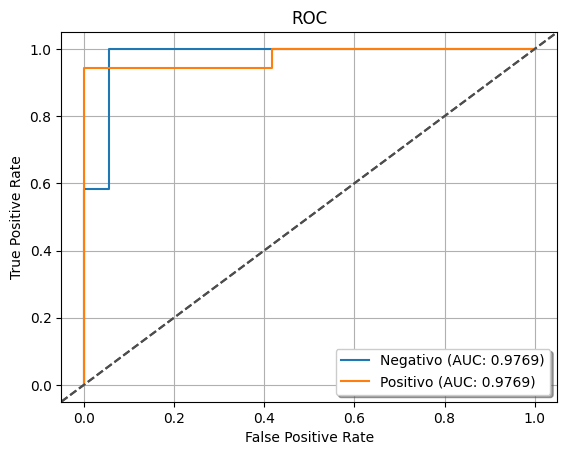

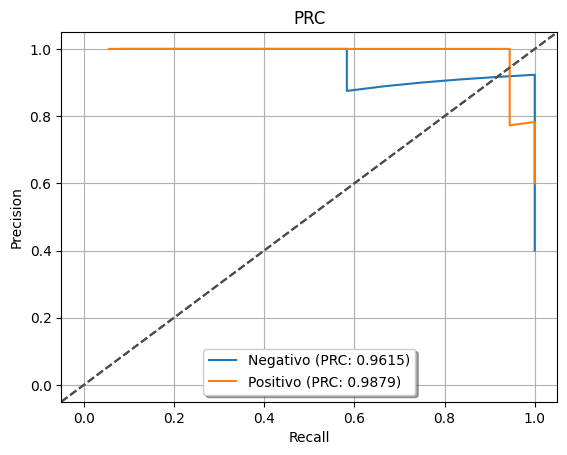

In [ ]:
print(evl.percent_correct)
print(evl.summary())
print(evl.class_details())
print(evl.confusion_matrix)


plcls.plot_roc(evl, class_index=[0, 1], wait=True)
plcls.plot_prc(evl, class_index=[0, 1], wait=True)


Tn 17.0 Fp 1.0 Fn 0.0 Tp 12.0
Sensibilidad: 1.0 Especificidad: 0.9444444444444444


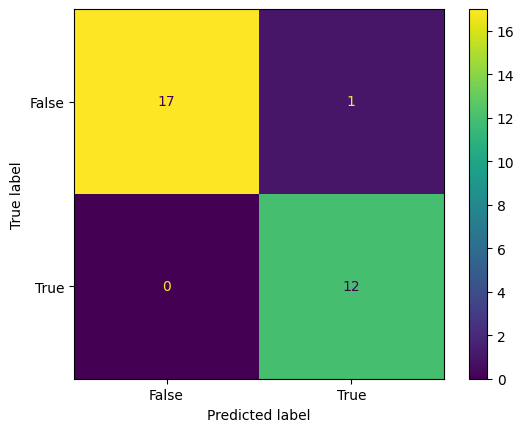

In [ ]:
#tn= true negative
#fp= false positive
#fn= false negative
#tp= true positive
tp = evl.num_true_positives(0)
tn = evl.num_true_negatives(0)
fp = evl.num_false_positives(0)
fn = evl.num_false_negatives(0)
print("Tn " +str( tn )+" Fp "+str(fp)+" Fn "+ str(fn)+ " Tp " + str(tp))
spe = tn/(tn+fp)
sen = tp/(tp+fn)
print("Sensibilidad: "+str(sen)+" Especificidad: "+str(spe))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix =np.array([[tn, fp],[fn, tp]]).astype(int), display_labels = [False, True])
cm_display.plot()
plt.show()

# **3. Wav2Vec 2.0**

1. Install requirements
2. Extract cough segments with Digital Hysteresis Comparator (DHC)
3. Split train and test sets
4. Extract features from train and test sets
5. Run auto ml with Wav2Vec 2.0 architecture to find the best training parameters
6. Replace parameters found with AutoML in Wav2Vec 2.0 architecture
7. Train Wav2Vec 2.0 CNN with train
8. Evaluate Wav2Vec 2.0 CNN model with test

## 3.1. Installation Requirements

In [ ]:
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-nvjztej0
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-nvjztej0
  Resolved https://github.com/huggingface/transformers.git to commit f40b87de0ca234df61f76928956c4a2118c0b548
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.38.0.dev0-py3-none-any.whl size=8408548 sha256=82e382d9ee9a502bac8d0c78c1b70c301eaa7c2983c3ea142f5ded6443daf8fe
  Stored in directory: /tmp/pip-ephem-wheel-cache-v8zb47ll/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [ ]:
import os
import glob
import librosa
import numpy as np
import pandas as pd

from transformers import TFWav2Vec2Model
import random
import logging

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

import zipfile

## 3.2. Segmentation with Digital Hysteresis Comparator (DHC)

---

The resource used was taken from the following publication:

Orlandic, L., Teijeiro, T. & Atienza, D. The COUGHVID crowdsourcing dataset, a corpus for the study of large-scale cough analysis algorithms. Sci Data 8, 156 (2021). https://doi.org/10.1038/s41597-021-00937-4

This is an example of how the tool was used.


In [ ]:
# path = '/content/audios/'

# for aud in os.listdir(path):
#   id = aud.split('_')[1]
#   if not os.path.isdir('DATASET/'+ id):
#     os.mkdir('DATASET/'+id)
#   if 'tos' in aud:
#     os.system('python3 /content/segment_cough.py -i ' +path+aud)

## 3.3. Division train and test


Link to access the CRD DB

/content/drive/MyDrive/InaoeProyecto/BDSegBalanceada/foldsCompleto

Link to access the Respiratory Conditions DB

/content/drive/MyDrive/InaoeProyecto/BDSegBalanceada/newfoldsCompleto

In [ ]:
# Lists to store the train and test dataframes of all folds
train_dfs = []
test_dfs = []

for i in range(10):
  # Read the train and test dataframes of each fold
  train_df = pd.read_csv(f'/content/drive/MyDrive/InaoeProyecto/BDSegBalanceada/foldsCompleto/train/train_df_{i}.csv') #fold{i+1}train.csv
  test_df = pd.read_csv(f'/content/drive/MyDrive/InaoeProyecto/BDSegBalanceada/foldsCompleto/test/test_df_{i}.csv') #fold{i+1}test.csv

  # Add dataframes to lists
  train_dfs.append(train_df)
  test_dfs.append(test_df)

# Concatenate all train and test dataframes
train_total = pd.concat(train_dfs)
test_total = pd.concat(test_dfs)

# Save concatenated dataframes to CSV files
train_total.to_csv('/content/dataTrainSegBalEpocCovidXEdad.csv', index=False)
test_total.to_csv('/content/dataTestSegBalEpocCovidXEdad.csv', index=False)

## 3.4. Characterization (16 KHZ signal, Attention mask)


In [ ]:
# Read the dataframes
train_df = pd.read_csv('/content/dataTrainSegBalEpocCovidXEdad.csv')
test_df = pd.read_csv('/content/dataTestSegBalEpocCovidXEdad.csv')

# Function to load the audio files and resample them to 16kHz
def load_and_resample_audio(file_path):
  try:
    audio, _ = librosa.load(file_path, sr=16000)
    return audio
  except:
    None

# Function to process the dataframes
def process_df(df):
    # Join the ‘path’ and ‘name’ columns to get the full file path
    df['file'] = df['path'].str.cat(df['Name'], sep=os.path.sep)

    # Replace ‘Negativo’ with 0 and ‘Positivo’ with 1 in the ‘clase’ column
    df['label'] = df['Class'].map({'Negativo': 0, 'Positivo': 1})

    # Load and resample the audio files
    df['audio'] = df['file'].apply(load_and_resample_audio)

    # Remove the rows where the ‘audio’ column is empty
    df = df.dropna(subset=['audio'])

    return df

# Process the dataframes
train_df = process_df(train_df)
test_df = process_df(test_df)

In [ ]:
# Desired duration in seconds
desired_length = 1.4

# Sampling rate (assuming 16kHz as in your previous example)
sampling_rate = 16000

# Number of samples the signal should have to have the desired duration
desired_samples = int(desired_length * sampling_rate)

# Function to adjust the length of the audio
def adjust_audio_length(audio):
  if len(audio) < desired_samples:
    # # Si la señal es más corta que lo deseado, agrega ceros al final
    # audio = np.pad(audio, (0, desired_samples - len(audio)))

    # If the signal is shorter than desired, replicate the signal until the desired number of samples is reached
    repeats = np.ceil(desired_samples / len(audio))
    audio = np.tile(audio, int(repeats))[:desired_samples]

  elif len(audio) > desired_samples:
    # If the signal is longer than desired, trim it
    audio = audio[:desired_samples]
  return audio

# Apply the function to all audio signals
train_df["audio"] = train_df["audio"].apply(adjust_audio_length)
test_df["audio"] = test_df["audio"].apply(adjust_audio_length)

## 3.5. AutoML

Run once the model has been built in the line:

*model = build_model(params)*

In [ ]:
from hyperopt import fmin, tpe, hp, Trials

space = {
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'dropout_rate': hp.uniform('dropout_rate', 0, 0.8),
    'dense_neurons': hp.choice('dense_neurons', [64, 128, 256]),
    #'batch_size': hp.choice('batch_size', [16, 32, 64]),
    'epochs': hp.choice('epochs', [2, 5, 10]),
    'optimizer': hp.choice('optimizer', ['adam', 'rmsprop']),
}

def f_nn(params):
    print(params)
    model = build_model(params)

    history = model.fit(
        train_x,
        train_y,
        validation_data=(test_x, test_y),
        batch_size=BATCH_SIZE,
        epochs=params['epochs'],
    )

    preds = model.predict(test_x)

    y_pred = np.argmax(preds, axis=1)
    y_true = test_y

    accuracy = np.sum(y_pred == y_true) / len(y_true)

    return -accuracy

trials = Trials()
best = fmin(f_nn, space, algo=tpe.suggest, max_evals=10, trials=trials)
print('Best hyperparameters:', best)

## 3.6. Automatic Classification

### 3.6.1. Configuration

In [ ]:
# Maximum duration of the input audio file that we feed to our Wav2Vec 2.0 model.
MAX_DURATION = 1

# The sampling rate is the number of audio samples recorded every second.
SAMPLING_RATE = 16000

BATCH_SIZE = 32  # Batch size for training and evaluating our model.

NUM_CLASSES = 2  # Number of classes that our dataset will have (2 in this case).

HIDDEN_DIM = 768 # Dimension of the output of our model (768 in case of Wav2Vec 2.0 - Base).

MAX_SEQ_LENGTH = MAX_DURATION * SAMPLING_RATE  # Maximum length of the input audio file.

# Wav2Vec 2.0 results in an output frequency with a step of approximately 20ms.
MAX_FRAMES = 49

MAX_EPOCHS = 5  # Maximum number of training epochs.

MODEL_CHECKPOINT = "facebook/wav2vec2-base"

In [ ]:
# Desired number of rows
num_rows = 320

# If df has fewer rows than num_rows, we replicate random rows until we reach num_rows
if len(train_df) < num_rows:
    train_df = train_df.sample(n=num_rows, replace=True, random_state=1)

In [ ]:
train_df = train_df[:len(train_df) // BATCH_SIZE * BATCH_SIZE]
test_df = test_df[:len(test_df) // BATCH_SIZE * BATCH_SIZE]

In [ ]:
# Function to calculate the average of the hidden states
def mean_pool(hidden_states, feature_lengths):

    attenion_mask = tf.sequence_mask(
        feature_lengths, maxlen=MAX_FRAMES, dtype=tf.dtypes.int64
    )

    padding_mask = tf.cast(
        tf.reverse(tf.cumsum(tf.reverse(attenion_mask, [-1]), -1), [-1]),
        dtype=tf.dtypes.bool,
    )

    hidden_states = tf.where(
        tf.broadcast_to(
            tf.expand_dims(~padding_mask, -1), (BATCH_SIZE, MAX_FRAMES, HIDDEN_DIM)
        ),
        0.0,
        hidden_states,
    )

    pooled_state = tf.math.reduce_sum(hidden_states, axis=1) / tf.reshape(
        tf.math.reduce_sum(tf.cast(padding_mask, dtype=tf.dtypes.float32), axis=1),
        [-1, 1],
    )
    return pooled_state

# Class for audio classification using Wav2Vec 2.0
class TFWav2Vec2ForAudioClassification(layers.Layer):


    def __init__(self, model_checkpoint, num_classes, learning_rate, dropout_rate, dense_neurons, optimizer):
        super().__init__()

        self.wav2vec2 = TFWav2Vec2Model.from_pretrained(
            model_checkpoint, apply_spec_augment=False, from_pt=True
        )
        self.pooling = layers.GlobalAveragePooling1D()

        self.intermediate_layer_dropout = layers.Dropout(dropout_rate)

        self.dense = layers.Dense(dense_neurons, activation='relu')

        self.final_layer = layers.Dense(num_classes, activation="softmax")


        self.optimizer = optimizer
        self.learning_rate = learning_rate

    def call(self, inputs):

        hidden_states = self.wav2vec2(inputs["input_values"])[0]


        if tf.is_tensor(inputs["attention_mask"]):

            audio_lengths = tf.cumsum(inputs["attention_mask"], -1)[:, -1]

            feature_lengths = self.wav2vec2.wav2vec2._get_feat_extract_output_lengths(
                audio_lengths
            )
            pooled_state = mean_pool(hidden_states, feature_lengths)

        else:
            pooled_state = self.pooling(hidden_states)

        intermediate_state = self.intermediate_layer_dropout(pooled_state)
        final_state = self.final_layer(intermediate_state)

        return final_state

In [ ]:
from sklearn.model_selection import train_test_split
from transformers import AutoFeatureExtractor

# Load the feature extractor
feature_extractor = AutoFeatureExtractor.from_pretrained(MODEL_CHECKPOINT, return_attention_mask=True)

def preprocess_function(examples):
  audio_arrays = examples["audio"].tolist()
  labels = examples["label"].tolist()
  if audio_arrays is None:
    None
  else:
    inputs = feature_extractor(
        audio_arrays,
        sampling_rate=feature_extractor.sampling_rate,
        max_length=MAX_SEQ_LENGTH,
        truncation=True,
        padding=True,
    )

    inputs = {key: inputs[key] for key in ['input_values', 'attention_mask']}
    inputs["label"] = labels
    return inputs

# Preprocess the datasets
train_inputs = preprocess_function(train_df)
test_inputs = preprocess_function(test_df)

In [ ]:
# Function to calculate the average of the hidden states
def mean_pool(hidden_states, feature_lengths):

    attenion_mask = tf.sequence_mask(
        feature_lengths, maxlen=MAX_FRAMES, dtype=tf.dtypes.int64
    )

    padding_mask = tf.cast(
        tf.reverse(tf.cumsum(tf.reverse(attenion_mask, [-1]), -1), [-1]),
        dtype=tf.dtypes.bool,
    )

    hidden_states = tf.where(
        tf.broadcast_to(
            tf.expand_dims(~padding_mask, -1), (BATCH_SIZE, MAX_FRAMES, HIDDEN_DIM)
        ),
        0.0,
        hidden_states,
    )

    pooled_state = tf.math.reduce_sum(hidden_states, axis=1) / tf.reshape(
        tf.math.reduce_sum(tf.cast(padding_mask, dtype=tf.dtypes.float32), axis=1),
        [-1, 1],
    )
    return pooled_state

# Class for audio classification using Wav2Vec 2.0
class TFWav2Vec2ForAudioClassification(layers.Layer):

    def __init__(self, model_checkpoint, num_classes, learning_rate, dropout_rate, dense_neurons, optimizer):
        super().__init__()

        self.wav2vec2 = TFWav2Vec2Model.from_pretrained(
            model_checkpoint, apply_spec_augment=False, from_pt=True
        )
        self.pooling = layers.GlobalAveragePooling1D()

        self.intermediate_layer_dropout = layers.Dropout(dropout_rate)

        self.dense = layers.Dense(dense_neurons, activation='relu')

        self.final_layer = layers.Dense(num_classes, activation="softmax")


        self.optimizer = optimizer
        self.learning_rate = learning_rate

    def call(self, inputs):

        hidden_states = self.wav2vec2(inputs["input_values"])[0]


        if tf.is_tensor(inputs["attention_mask"]):

            audio_lengths = tf.cumsum(inputs["attention_mask"], -1)[:, -1]

            feature_lengths = self.wav2vec2.wav2vec2._get_feat_extract_output_lengths(
                audio_lengths
            )
            pooled_state = mean_pool(hidden_states, feature_lengths)

        else:
            pooled_state = self.pooling(hidden_states)

        intermediate_state = self.intermediate_layer_dropout(pooled_state)
        final_state = self.final_layer(intermediate_state)

        return final_state

In [ ]:
from keras import backend as K

# Function to build the model
def build_model(params):

    def specificity(y_true, y_pred):
      true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
      possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
      return true_negatives / (possible_negatives + K.epsilon())

    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        return true_positives / (possible_positives + K.epsilon())

    learning_rate = params['learning_rate']
    dropout_rate = params['dropout_rate']
    dense_neurons = params['dense_neurons']
    optimizer = params['optimizer']


    inputs = {
        "input_values": tf.keras.Input(shape=(MAX_SEQ_LENGTH,), dtype="float32"),
        "attention_mask": tf.keras.Input(shape=(MAX_SEQ_LENGTH,), dtype="int32"),
    }

    wav2vec2_model = TFWav2Vec2ForAudioClassification(MODEL_CHECKPOINT, NUM_CLASSES, learning_rate, dropout_rate, dense_neurons, optimizer)(
        inputs
    )

    model = tf.keras.Model(inputs, wav2vec2_model)

    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

    optimizer = keras.optimizers.Adam(learning_rate=1e-5)

    model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy", recall, specificity])
    return model


params = {'dense_neurons': 128, 'dropout_rate': 0.3809710242944257, 'epochs': 10, 'learning_rate': 0.7037355425753942, 'optimizer': 'rmsprop'}

model = build_model(params)


TFWav2Vec2Model has backpropagation operations that are NOT supported on CPU. If you wish to train/fine-tune this model, you need a GPU or a TPU
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFWav2Vec2Model: ['project_hid.weight', 'project_q.weight', 'project_q.bias', 'quantizer.weight_proj.weight', 'quantizer.codevectors', 'quantizer.weight_proj.bias', 'project_hid.bias']
- This IS expected if you are initializing TFWav2Vec2Model from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFWav2Vec2Model from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFWav2Vec2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the che

In [ ]:
MAX_EPOCHS = params['epochs']

In [ ]:
# It creates an empty dictionary for the training inputs.
train_x = {}

for clave in train_inputs.keys():
  a = []
  if clave != "label":
    for info in train_inputs[clave]:
      a.append(info.tolist())
    train_x[clave] = np.array(a)

In [ ]:
# It creates an empty dictionary for the testing inputs.
test_x = {}

for clave in test_inputs.keys():
  a = []
  if clave != "label":
    for info in test_inputs[clave]:
      a.append(info.tolist())
    test_x[clave] = np.array(a)


In [ ]:
test_y = np.array(test_inputs["label"])
train_y = np.array(train_inputs["label"])

### 3.6.1. Training

In [ ]:
history = model.fit(
    train_x,
    train_y,
    validation_data=(test_x, test_y),
    batch_size=BATCH_SIZE,
    epochs=MAX_EPOCHS,
)

Epoch 1/10


  1/109 [..............................] - ETA: 4:56:25 - loss: 0.6179 - accuracy: 0.6250 - recall: 1.0000 - specificity: 1.0000

## 3.7. Test Result

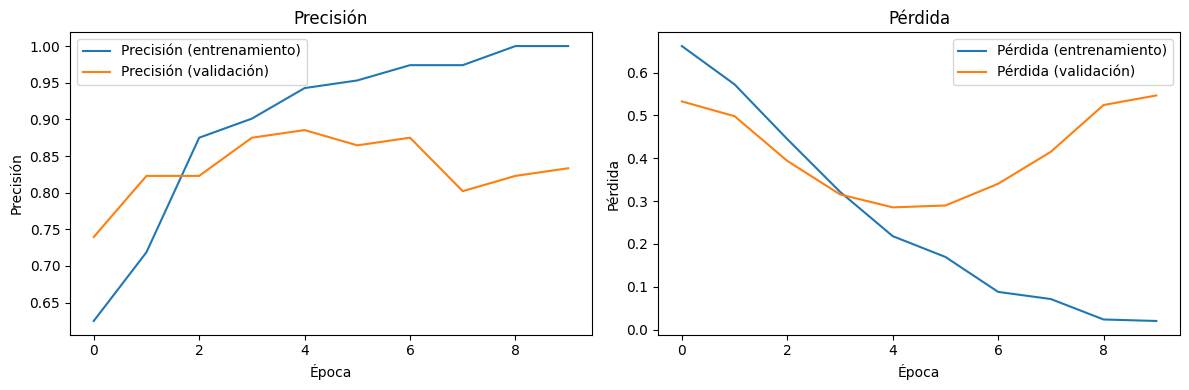

In [ ]:
# Create a figure
plt.figure(figsize=(12, 4))

# Subplot for precision
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.title('Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.title('Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Show the figure
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

        Sano       0.72      0.77      0.74        30
     Enfermo       0.89      0.86      0.88        66

    accuracy                           0.83        96
   macro avg       0.80      0.82      0.81        96
weighted avg       0.84      0.83      0.83        96



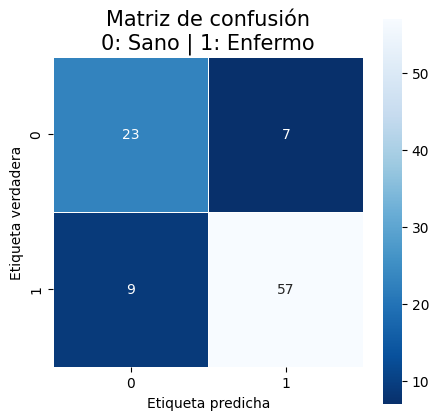

In [ ]:
# Convert probabilities to class labels
y_pred = np.argmax(preds, axis=1)
y_true = test_y

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Show confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Etiqueta verdadera');
plt.xlabel('Etiqueta predicha');
all_sample_title = 'Matriz de confusión\n0: Sano | 1: Enfermo'
plt.title(all_sample_title, size = 15);

# Calculate and print ranking metrics
report = classification_report(y_true, y_pred, target_names=['Sano', 'Enfermo'])
print(report)

In [ ]:
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

# Calculate and print precision
precision = precision_score(y_true, y_pred)
print(f"La precisión es {precision:.2f}")

# Calculate and print the recall (sensitivity)
recall = tp / (tp+fn)
print(f"El recall (sensibilidad) es {recall:.2f}")

# Calculate and print specificity
especificidad = tn / (tn+fp)
print(f"La especificidad es {especificidad:.2f}")

# Calculate and print the accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"La accuracy es {accuracy:.2f}")

# Calculate and print the F1-score
f1 = f1_score(y_true, y_pred)
print(f"El F1-score es {f1:.2f}")

La precisión es 0.89
El recall (sensibilidad) es 0.86
La especificidad es 0.77
La accuracy es 0.83
El F1-score es 0.88


# **4. VGGish**

1. Install requirements
2. Extract cough segments with Digital Hysteresis Comparator (DHC)
3. Split train and test sets
4. Extract features from train and test sets
5. Run auto ml with 1D CNN architecture to find the best training parameters
6. Replace parameters found with AutoML in CNN1D architecture
7. Train 1D CNN with train
8. Evaluate 1D CNN model with test

## 4.1. Installation Requirements

In [ ]:
!pip install numpy scipy
!pip install resampy tensorflow six

# Upgrade pip first. Also make sure wheel is installed.
!sudo python -m pip install --upgrade pip wheel

# Install all dependences.
!sudo pip install -r requirements.txt

# Clone TensorFlow models repo into a 'models' directory.
!git clone https://github.com/tensorflow/models.git
!cd models/research/audioset/vggish
# Download data files into same directory as code.
!curl -O https://storage.googleapis.com/audioset/vggish_model.ckpt
!curl -O https://storage.googleapis.com/audioset/vggish_pca_params.npz

# Installation ready, let's test it.
!python /content/models/research/audioset/vggish/vggish_smoke_test.py
# If we see "Looks Good To Me", then we're all set.

import sys
sys.path.insert(0, '/content/models/research/audioset/vggish')

import vggish_slim
import vggish_params
import vggish_input

In [ ]:
!pip install pydub
import vggish_postprocess

## 4.2. Segmentation with Digital Hysteresis Comparator (DHC)

---

The resource used was taken from the following publication:

Orlandic, L., Teijeiro, T. & Atienza, D. The COUGHVID crowdsourcing dataset, a corpus for the study of large-scale cough analysis algorithms. Sci Data 8, 156 (2021). https://doi.org/10.1038/s41597-021-00937-4

This is an example of how the tool was used.


In [ ]:
# path = '/content/audios/'

# for aud in os.listdir(path):
#   id = aud.split('_')[1]
#   if not os.path.isdir('DATASET/'+ id):
#     os.mkdir('DATASET/'+id)
#   if 'tos' in aud:
#     os.system('python3 /content/segment_cough.py -i ' +path+aud)

## 4.3. Division train and test

Link to access the CRD DB

/content/drive/MyDrive/InaoeProyecto/BDSegBalanceada/foldsCompleto

Link to access the Respiratory Conditions DB

/content/drive/MyDrive/InaoeProyecto/BDSegBalanceada/newfoldsCompleto

In [ ]:
import os
import librosa
import pandas as pd

# Read the dataframes
train_df = pd.read_csv('/content/drive/MyDrive/InaoeProyecto/BDSegBalanceada/newfoldsCompleto/train_df_0.csv')
test_df = pd.read_csv('/content/drive/MyDrive/InaoeProyecto/BDSegBalanceada/newfoldsCompleto/test_df_0.csv')

# Function to load the audio files and downsample them to 16kHz
def load_and_resample_audio(file_path):
  try:
    audio, _ = librosa.load(file_path, sr=16000)
    return audio
  except:
    None

# Function to process the dataframes
def process_df(df):

    df['file'] = df['path'].str.cat(df['Name'], sep=os.path.sep)

    df['label'] = df['Class'].map({'Negativo': 0, 'Positivo': 1})

    df['audio'] = df['file'].apply(load_and_resample_audio)

    df = df.dropna(subset=['audio'])

    return df

# Process the dataframes
train_df = process_df(train_df)
test_df = process_df(test_df)

In [ ]:
import numpy as np

# Desired duration in seconds
desired_length = 1.4

# Tasa de muestreo (asumiendo 16kHz como en tu ejemplo anterior)
sampling_rate = 16000

# Sampling rate (assuming 16kHz as in your example above)
desired_samples = int(desired_length * sampling_rate)

def adjust_audio_length(audio):
  if len(audio) < desired_samples:

    repeats = np.ceil(desired_samples / len(audio))
    audio = np.tile(audio, int(repeats))[:desired_samples]

  elif len(audio) > desired_samples:

    audio = audio[:desired_samples]
  return audio

# Applies the function to all audio signals
train_df["audio"] = train_df["audio"].apply(adjust_audio_length)
test_df["audio"] = test_df["audio"].apply(adjust_audio_length)

In [ ]:
!mkdir cough
!mkdir cough/train
!mkdir cough/test

In [ ]:
import soundfile as sf
import tensorflow as tf
from sklearn import preprocessing

def process_audio_files(df, output_path):

  # Load the PCA model for post processing
  pproc = vggish_postprocess.Postprocessor('vggish_pca_params.npz')

  for index, row in df.iterrows():
    audio = row["audio"]
    etiqueta = row["label"]
    nombre = row["Name"]

    # Save the numpy array as a wav file
    sf.write('audio_ajustado.wav', audio, 16000)

    examples_batch = vggish_input.wavfile_to_examples("/content/audio_ajustado.wav")
    os.remove("/content/audio_ajustado.wav")

    # Configure TensorFlow to use the allow_growth option
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.allow_growth = True

    # Load the pre-trained VGGish model.
    with tf.Graph().as_default(), tf.compat.v1.Session(config=config) as sess:
        # Defines the model input.
        vggish_slim.define_vggish_slim(training=False)
        vggish_slim.load_vggish_slim_checkpoint(sess,  'vggish_model.ckpt')
        features_tensor = sess.graph.get_tensor_by_name(
              vggish_params.INPUT_TENSOR_NAME)
        embedding_tensor = sess.graph.get_tensor_by_name(
              vggish_params.OUTPUT_TENSOR_NAME)

        # Load an audio file and extract its features.
        [embedding_batch] = sess.run([embedding_tensor],
        feed_dict={features_tensor: examples_batch})
        postprocessed_batch = pproc.postprocess(embedding_batch)

        emb = postprocessed_batch

        emb = emb.flatten()

        print(emb.shape)
        embedding_arr = preprocessing.normalize(emb.reshape(1, -1))


        data = {'features': emb, 'label': etiqueta}
        id = index
        name = nombre,"_",etiqueta
        output_file = os.path.join(output_path, f"{name}.npy")
        os.makedirs(os.path.dirname(output_file), exist_ok=True)
        np.save(output_file, data)

## 4.4. Characterization (VGGish: Spectrogram)

In [ ]:
import shutil as sh
sh.rmtree("/content/cough")

In [ ]:
# Define entry and exit routes
output_train_path = "/content/cough/train/"
output_test_path = "/content/cough/test/"

# Load training and test data
process_audio_files(train_df, output_train_path)
process_audio_files(test_df, output_test_path)

In [ ]:
def load_data(path):
  features = []
  labels = []

  for segmento in os.listdir(path):
    if "npy" in segmento:
      data = np.load(f'{path}/{segmento}', allow_pickle=True).item()
      features.append(data['features'])
      labels.append(data['label'])

  return np.array(features), np.array(labels)

# Load training, testing and validation data
train_features, train_labels = load_data("/content/cough/train/")
test_features, test_labels = load_data("/content/cough/test/")

In [ ]:
import keras
from keras.utils import to_categorical

# Encode the tags (if they are categorical)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## 4.5. AutoML

In [ ]:
from sklearn import preprocessing
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, Input, Reshape
from tensorflow.keras.callbacks import ModelCheckpoint

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

space = {
    'dropout1': hp.choice('dropout1', [.25,.50, .75]),
    'batch_size' : hp.choice('batch_size', [28,128]),
    'epochs' :  hp.choice('epochs', [70, 100]),
    'regul': hp.uniform('regul', 0, 1),
    'optimizer': hp.choice('optimizer',['adadelta','adam','rmsprop']),
    'activation': 'relu'
}

def f_nn(params):
    print(params)
    enfermo_aus_model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(128,)),
        tf.keras.layers.Reshape((128, 1)),
        tf.keras.layers.Conv1D(32, kernel_size=3, activation=params['activation'], kernel_regularizer=regularizers.l2(params['regul'])),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Conv1D(64, kernel_size=3, activation=params['activation'], kernel_regularizer=regularizers.l2(params['regul'])),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Conv1D(128, kernel_size=3, activation=params['activation'], kernel_regularizer=regularizers.l2(params['regul'])),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation=params['activation'], kernel_regularizer=regularizers.l2(params['regul'])),
        tf.keras.layers.Dense(32, activation=params['activation'], kernel_regularizer=regularizers.l2(params['regul'])),
        tf.keras.layers.Dropout(params['dropout1']),
        tf.keras.layers.Dense(2, activation='softmax')
    ])

    enfermo_aus_model.compile(loss="categorical_crossentropy", optimizer=params['optimizer'], metrics=["accuracy"])
    callbacks = [ModelCheckpoint(filepath='aus.{epoch:02d}-val_a:{val_accuracy:.2f}.h5', monitor='val_accuracy', save_best_only=True, verbose=1)]

    history = enfermo_aus_model.fit(
        x=train_features,
        y=train_labels,
        epochs=params['epochs'],
        callbacks=callbacks,
        batch_size=params['batch_size'],
        validation_data=(test_features, test_labels)
    )

    validation_acc = np.amax(history.history['val_accuracy'])
    print('Best validation acc of epoch:', validation_acc)
    return {'loss': -validation_acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f_nn, space, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:', best)


## 4.6. Automatic Classification

### 4.6.1. Configuration

In [ ]:
from sklearn import preprocessing
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, Input, Reshape
from tensorflow.keras.callbacks import ModelCheckpoint
from keras import backend as K

# Define specificity metric
def specificity(y_true, y_pred):
  true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
  possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
  return true_negatives / (possible_negatives + K.epsilon())

# Define recall/sensitivity metric
def recall(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  return true_positives / (possible_positives + K.epsilon())

best = {'activation': 'relu', 'batch_size': 28, 'dropout1': 0.25, 'epochs': 100, 'optimizer': 'adam', 'regul': 0.30302989852288953}

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(128,)),
    tf.keras.layers.Reshape((128, 1)),
    tf.keras.layers.Conv1D(32, kernel_size=3, activation=best['activation'], kernel_regularizer=regularizers.l2(best['regul'])),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation=best['activation'], kernel_regularizer=regularizers.l2(best['regul'])),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(128, kernel_size=3, activation=best['activation'], kernel_regularizer=regularizers.l2(best['regul'])),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=best['activation'], kernel_regularizer=regularizers.l2(best['regul'])),
    tf.keras.layers.Dense(32, activation=best['activation'], kernel_regularizer=regularizers.l2(best['regul'])),
    tf.keras.layers.Dropout(best['dropout1']),
    tf.keras.layers.Dense(2, activation='softmax')
  ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 128, 1)            0         
                                                                 
 conv1d (Conv1D)             (None, 126, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 63, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 61, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 30, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 28, 128)           2

### 4.6.2. Training

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=best['optimizer'], metrics=["accuracy", specificity, recall])
callbacks = [ModelCheckpoint(filepath='aus.{epoch:02d}-val_a:{val_accuracy:.2f}.h5', monitor='val_accuracy', save_best_only=True, verbose=1)]

history = model.fit(
        x=train_features,
        y=train_labels,
        epochs=best['epochs'],
        callbacks=callbacks,
        batch_size=best['batch_size'],
        validation_data=(test_features, test_labels)
    )

Epoch 1/100
5/8 [=================>............] - ETA: 0s - loss: 91.8499 - accuracy: 0.4643 - specificity: 0.4643 - recall: 0.4643 
Epoch 1: val_accuracy improved from -inf to 0.31250, saving model to aus.01-val_a:0.31.h5
8/8 [==============================] - 2s 85ms/step - loss: 88.1153 - accuracy: 0.5157 - specificity: 0.5160 - recall: 0.5160 - val_loss: 79.2917 - val_accuracy: 0.3125 - val_specificity: 0.3274 - val_recall: 0.3274
Epoch 2/100
5/8 [=================>............] - ETA: 0s - loss: 73.7077 - accuracy: 0.6000 - specificity: 0.6000 - recall: 0.6000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy improved from 0.31250 to 0.55208, saving model to aus.02-val_a:0.55.h5
8/8 [==============================] - 0s 32ms/step - loss: 70.9336 - accuracy: 0.6188 - specificity: 0.6186 - recall: 0.6186 - val_loss: 63.5040 - val_accuracy: 0.5521 - val_specificity: 0.5446 - val_recall: 0.5446
Epoch 3/100
5/8 [=================>............] - ETA: 0s - loss: 61.0408 - accuracy: 0.5000 - specificity: 0.5000 - recall: 0.5000
Epoch 3: val_accuracy did not improve from 0.55208
8/8 [==============================] - 0s 21ms/step - loss: 59.2003 - accuracy: 0.5381 - specificity: 0.5382 - recall: 0.5382 - val_loss: 53.9100 - val_accuracy: 0.4583 - val_specificity: 0.4762 - val_recall: 0.4762
Epoch 4/100
5/8 [=================>............] - ETA: 0s - loss: 51.7482 - accuracy: 0.6357 - specificity: 0.6357 - recall: 0.6357
Epoch 4: val_accuracy improved from 0.55208 to 0.58333, saving model to aus.04-val_a:0.58.h5
8/8 [==============================] - 0s 27ms/step - loss: 50.2

## 4.7. Test result

4/4 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

        Sano       0.82      0.87      0.84        62
     Enfermo       0.87      0.82      0.84        66

    accuracy                           0.84       128
   macro avg       0.84      0.84      0.84       128
weighted avg       0.85      0.84      0.84       128



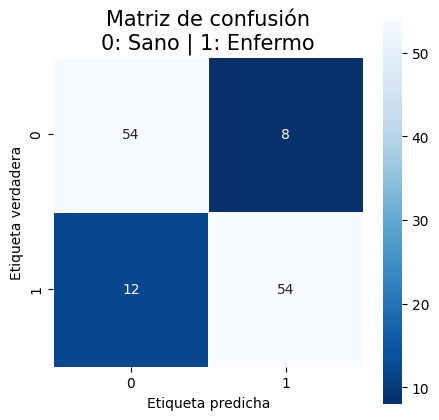

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Predict probabilities for test data
test_predictions = model.predict(test_features)

# Convert probabilities to class labels
y_pred = np.argmax(test_predictions, axis=1)
y_true = np.argmax(test_labels, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Show confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Etiqueta verdadera');
plt.xlabel('Etiqueta predicha');
all_sample_title = 'Matriz de confusión\n0: Sano | 1: Enfermo'
plt.title(all_sample_title, size = 15);

# Calculate and print ranking metrics
report = classification_report(y_true, y_pred, target_names=['Sano', 'Enfermo'])
print(report)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

# Calculate and print precision
precision = precision_score(y_true, y_pred)
print(f"La precisión es {precision:.2f}")

# Calculate and print the recall (sensitivity)
recall = tp / (tp+fn)
print(f"El recall (sensibilidad) es {recall:.2f}")

# Calculate and print specificity
especificidad = tn / (tn+fp)
print(f"La especificidad es {especificidad:.2f}")

# Calculate and print the accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"La accuracy es {accuracy:.2f}")

# Calculate and print the F1-score
f1 = f1_score(y_true, y_pred)
print(f"El F1-score es {f1:.2f}")

La precisión es 0.87
El recall (sensibilidad) es 0.82
La especificidad es 0.87
La accuracy es 0.84
El F1-score es 0.84
